<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/Image_Processing_edit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting github

In [ ]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 211 (delta 143), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (211/211), 45.69 MiB | 2.32 MiB/s, done.
Resolving deltas: 100% (143/143), done.


#Removing Frequency band Noise
##Sin, Cos Noise
Injection of simple sine, cosine wave as periodic noise

complex128
9.23795762108881e-13
500729.49154169904


(None, None)

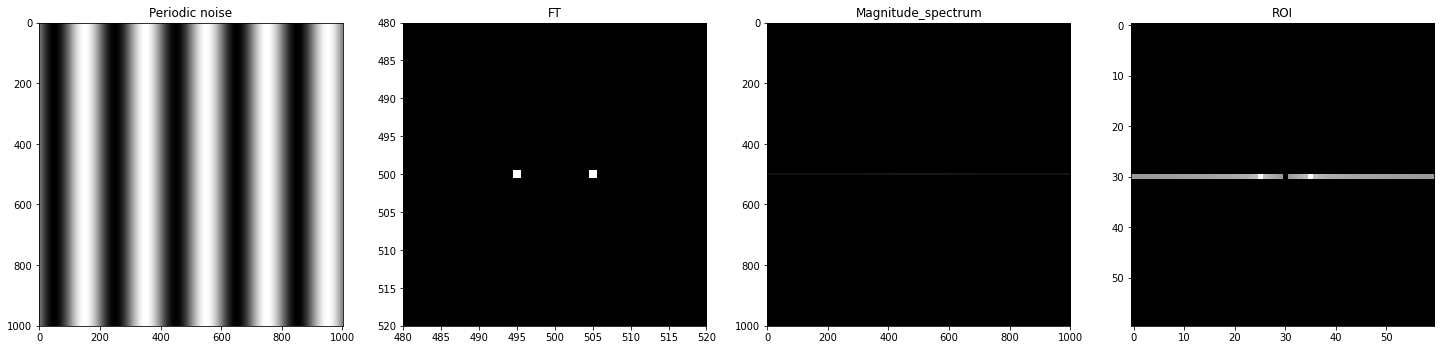

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = 0

grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(grating)
plt.title('Periodic noise')

ft1 = np.fft.fft2(grating)
ft1 = np.fft.fftshift(ft1)
magnitude_spectrum1 = 20*np.log(np.abs(ft1)+0.001)

plt.subplot(142)
plt.imshow(abs(ft1))
plt.title('Fourier transform')
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum1)
plt.title('Magnitude_spectrum')

ROI1 = magnitude_spectrum1[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI1, cmap='gray')
plt.title('ROI')

print(ft1.dtype)
print(abs(ft1[500, 500])), print(abs(ft1[500, 495]))

##Input Source
Injection of Original src and analysis

complex128
8614.816106776349
181.22477838222363


(None, None)

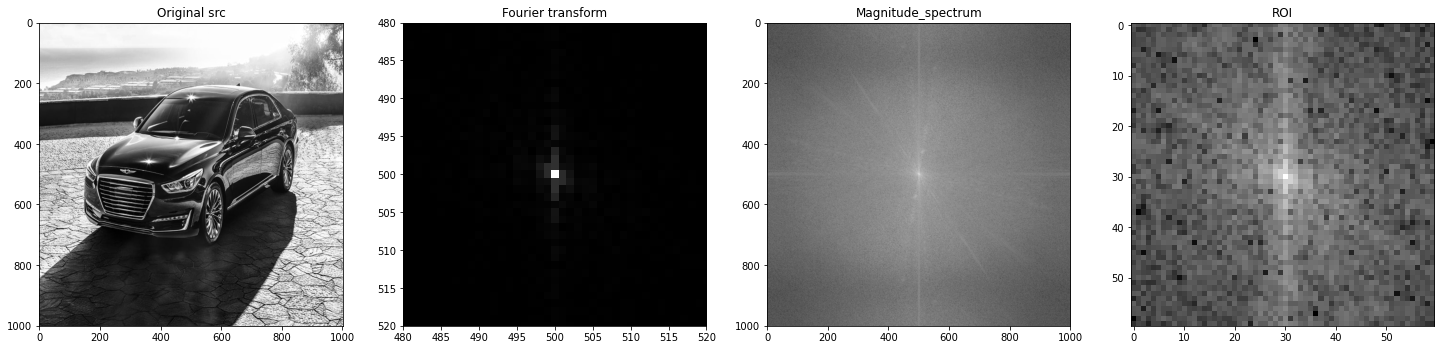

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

original = color.rgb2gray(io.imread('/content/AP_Test_OPEN/G90_2.jpg'))
original = cv2.resize(original, (1001, 1001))

fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(original)
plt.title('Original src')

ft2 = np.fft.fft2(original)
ft2 = np.fft.fftshift(ft2)
magnitude_spectrum2 = 20*np.log(np.abs(ft2)+0.001)

plt.subplot(142)
plt.imshow(abs(ft2))
plt.title('Fourier transform')
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum2)
plt.title('Magnitude_spectrum')

ROI2 = magnitude_spectrum2[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI2, cmap='gray')
plt.title('ROI')

print(ft2.dtype)
print(abs(ft2[500, 495])), print(ROI2[30, 25])

##Blend Images and Noise

<function matplotlib.pyplot.show>

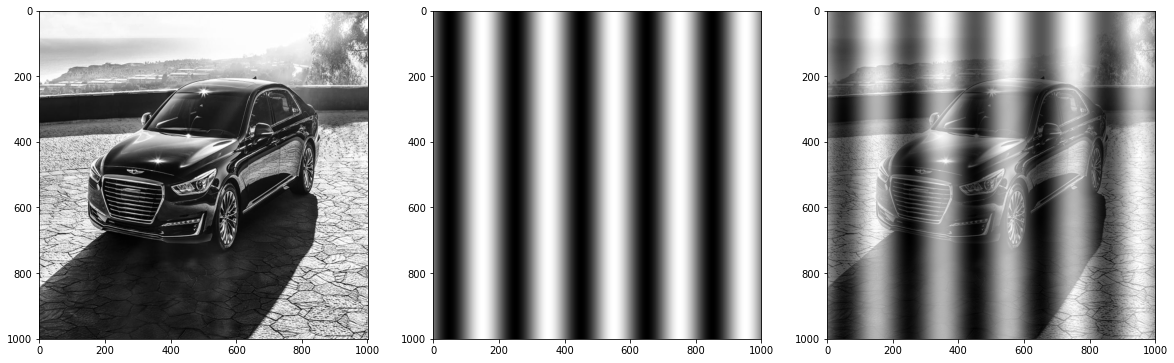

In [ ]:
noised = cv2.add(original, grating)

fig, axs = plt.subplots(1,3, figsize = (20, 10))
axs[0].imshow(original, cmap ='gray')
axs[1].imshow(grating, cmap ='gray')
axs[2].imshow(noised, cmap ='gray')
plt.show 

##Noised signal analysis with frequency

complex128
504720.6457072875
(-15582.686044509193-504480.03934627527j)
262.6352076072559


(None, None, None)

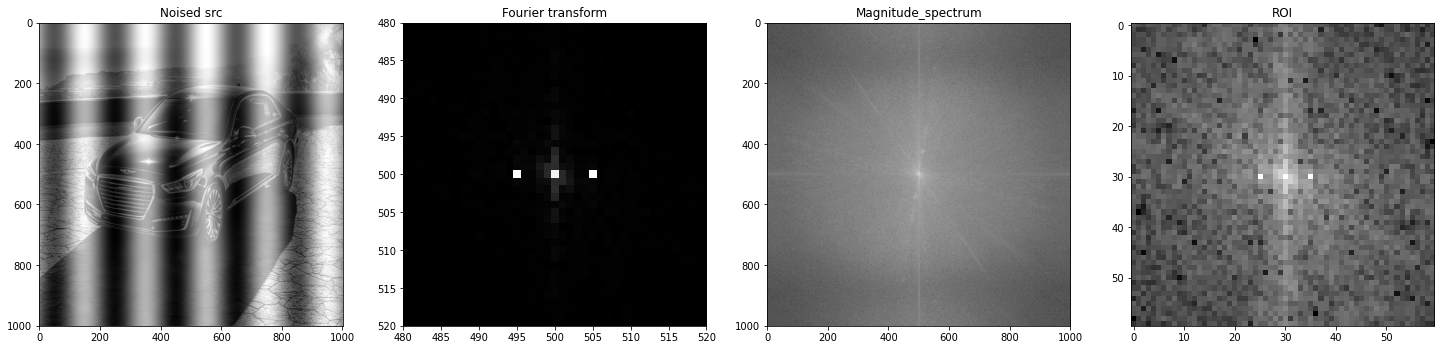

In [ ]:
fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(noised)
plt.title('Noised src')

ft3 = np.fft.fft2(noised)
ft3 = np.fft.fftshift(ft3)
magnitude_spectrum3 = 20*np.log(np.abs(ft3)+0.001)

plt.subplot(142)
plt.imshow(abs(ft3))
plt.title('Fourier transform')
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum3)
plt.title('Magnitude_spectrum')

ROI3 = magnitude_spectrum3[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI3, cmap='gray')
plt.title('ROI')

print(ft3.dtype)
print(abs(ft3[500, 495])), print((ft3[500, 495])), print(ROI3[30, 25])

##Noise Removal at Frequency domain

complex128
0.0
-138.15510557964274


(None, None)

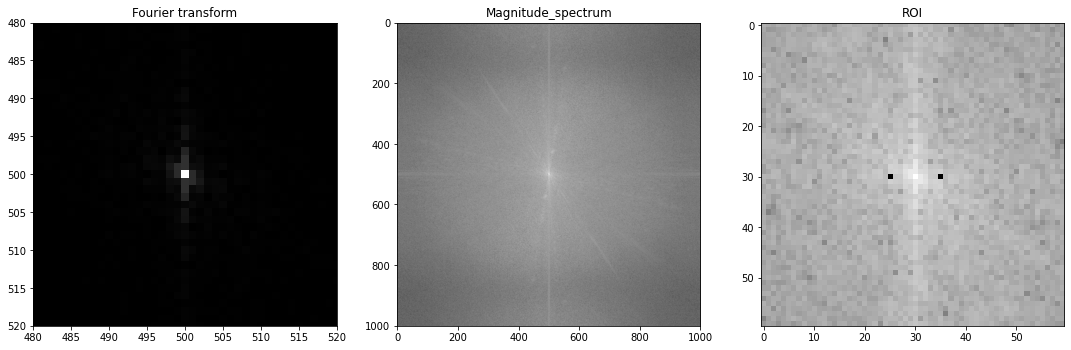

In [ ]:
ft4 = ft3
#############################################
ft4[500, 495] = 0
ft4[500, 505] = 0
#############################################

fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
#plt.subplot(141)
#plt.imshow(noised)

##############################################
ft4 = np.fft.ifftshift(ft4)
ft4 = np.fft.fftshift(ft4)
magnitude_spectrum4 = 20*np.log(np.abs(ft4)+0.001)
##############################################

plt.subplot(142)
plt.imshow(abs(ft4))
plt.title('Fourier transform')
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum4)
plt.title('Magnitude_spectrum')

ROI4 = magnitude_spectrum4[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI4, cmap='gray')
plt.title('ROI')

print(ft4.dtype)
print(abs(ft4[500, 495])), print(ROI4[30, 25])


##Noise Removal, Image Restoration


Text(0.5, 1.0, 'Restoration')

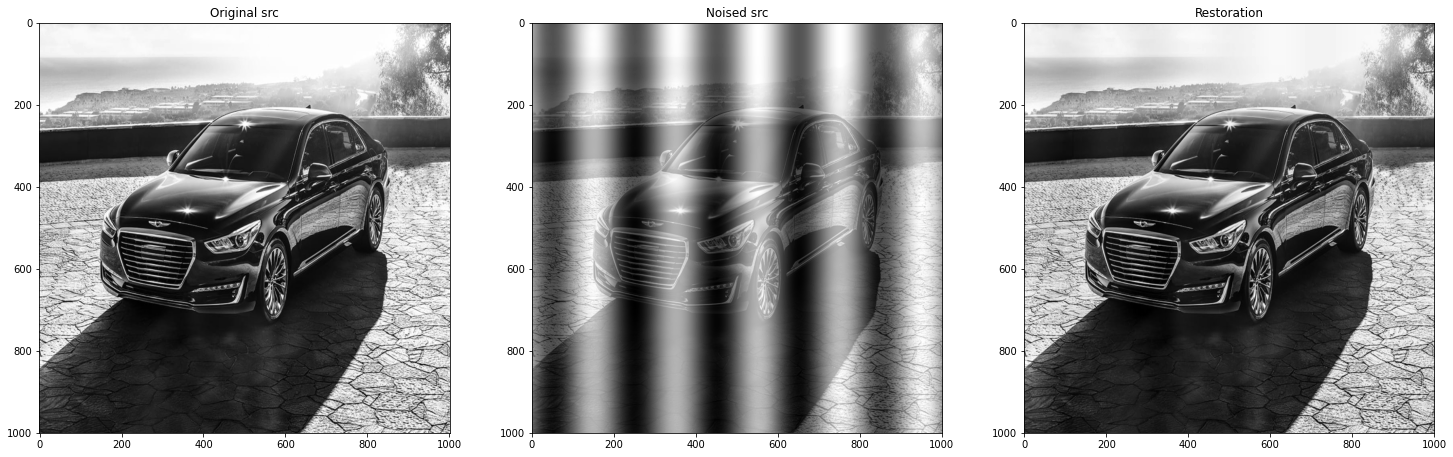

In [ ]:
fig = plt.figure(figsize=(25, 10))
f_ishift= np.fft.ifftshift(ft4)
img_back= np.fft.ifft2(f_ishift)
img_back= np.abs(img_back)

plt.subplot(131)
plt.imshow(original)
plt.title('Original src')

plt.subplot(132)
plt.imshow(noised)
plt.title('Noised src')

plt.subplot(133)
plt.imshow(img_back)
plt.title('Restoration')
